# 돌아감 정확도 33%


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_excel('wireless_softmax.xlsx')
data = data.iloc[:,0:8]
data.head()

,userid,Low price,Noise cancelling,Battery time,Light weight,Brand,Sound Quality,wish device
0,1,1,4,3,5,6,2,Airpod pro
1,2,3,5,4,6,2,1,Buds pro
2,3,4,3,5,6,2,1,Buds pro
3,4,3,4,6,5,1,2,Buds pro
4,5,4,5,2,1,6,3,Airpod pro


In [3]:
#sns.set(style = 'ticks', color_codes = True)
#g = sns.pairplot(data , hue = 'wish device', palette = 'husl')

In [4]:
#sns.barplot(data['wish device'], data['Low price'], ci = None)

In [5]:
#data['wish device'].value_counts().plot(kind = 'bar')

In [6]:
data['wish device'] = data['wish device'].\
replace(['Airpod pro','Buds pro', 'Airpod 3','SONY WF-1000XM4', 'Airpod 2', 'QCY T13', 'Buds 2' ],\
        [0,1,2,3,4,5,6])
#data['wish device'].value_counts().plot(kind = 'bar')

y_test나 y_train에 7이 없으면 6개로만 나옴.


In [7]:
data_X = data.iloc[:,1:7].values
data_y = data['wish device'].values
print(data_X[:5])
print(data_y[:5])

[[1 4 3 5 6 2]
 [3 5 4 6 2 1]
 [4 3 5 6 2 1]
 [3 4 6 5 1 2]
 [4 5 2 1 6 3]]
[0 1 1 1 0]


In [8]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

In [9]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)
print(y_train[:2])
print(y_test[:2])


[[0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(7, input_dim=6, activation='softmax'))

In [12]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))
#history = model.fit(X_train, y_train, epochs=400, batch_size=4, validation_data=(X_test, y_test))

Epoch 1/50
68/68 [==============================] - 1s 4ms/step - loss: 2.6792 - accuracy: 0.2206 - val_loss: 2.6445 - val_accuracy: 0.1667
Epoch 2/50
68/68 [==============================] - 0s 2ms/step - loss: 2.5456 - accuracy: 0.2647 - val_loss: 2.6365 - val_accuracy: 0.2222
Epoch 3/50
68/68 [==============================] - 0s 2ms/step - loss: 2.4651 - accuracy: 0.2500 - val_loss: 2.6039 - val_accuracy: 0.2222
Epoch 4/50
68/68 [==============================] - ETA: 0s - loss: 2.4269 - accuracy: 0.1915   - 0s 2ms/step - loss: 2.4201 - accuracy: 0.2500 - val_loss: 2.5845 - val_accuracy: 0.3333
Epoch 5/50
68/68 [==============================] - 0s 2ms/step - loss: 2.3709 - accuracy: 0.2500 - val_loss: 2.5532 - val_accuracy: 0.3333
Epoch 6/50
68/68 [==============================] - ETA: 0s - loss: 2.2904 - accuracy: 0.2727   - 0s 2ms/step - loss: 2.3419 - accuracy: 0.2500 - val_loss: 2.5254 - val_accuracy: 0.3333
Epoch 7/50
68/68 [==============================] - 0s 2ms/step - lo

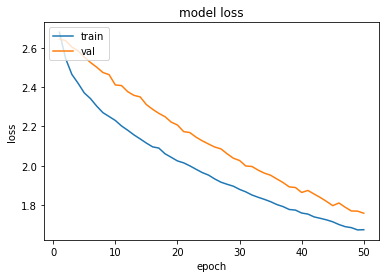

In [14]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [15]:
model.evaluate(X_test, y_test)[1]

1/1 [==============================] - 0s 128ms/step - loss: 1.7591 - accuracy: 0.3889


0.3888888955116272